In [12]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_bands = 8
resolution = 32
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3)/2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3)/2, -0.5))
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))]
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(y=0.5),          # M
    mp.Vector3(-1./3, 1./3),    # K
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(4, k_points)

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)
ms.run_tm(mpb.output_at_kpoint(mp.Vector3(-1./3, 1./3), mpb.fix_efield_phase,
          mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.39999999999999997, 0.0>
  Vector3<-0.26666666666666666, 0.36666666666666664, 0.0>
  Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>
  Vector3<-0.26666666666666666, 0.26666666666666666, 0.0>
  Vector3<-0.19999999999999998, 0.19999999999999998, 0.0>
  Vector3<-0.1333333333333333, 0.1333333333333333, 0.0>
  Vector3<-0.06666666666666665, 0.06666666666666665, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.03281402587890625
elapsed time for k point: 0.060276031494140625
elapsed time for k point: 0.029212474822998047
elapsed time for k point: 0.02941298484802246
elapsed time for k point: 0.026721

In [17]:
md = mpb.MPBData(rectify=True, periods=3, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
converted_eps.shape

(96, 83)

In [18]:
import csv
with open('2D.csv', 'wt') as f:
    writer = csv.writer(f)
    writer.writerows(converted_eps)

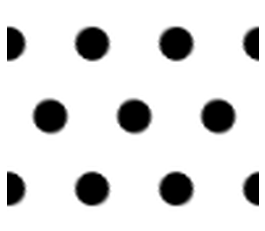

In [7]:
plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

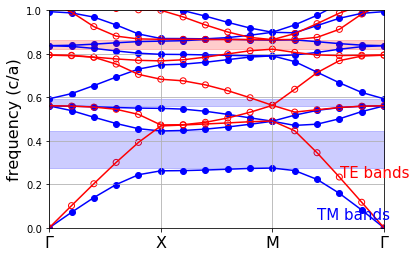

In [8]:
fig, ax = plt.subplots()

x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
ax.plot(te_freqs, color='red')
ax.set_ylim([0, 1])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='blue', size=15)
ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.39999999999999997, 0.0>
  Vector3<-0.26666666666666666, 0.36666666666666664, 0.0>
  Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>
  Vector3<-0.26666666666666666, 0.26666666666666666, 0.0>
  Vector3<-0.19999999999999998, 0.19999999999999998, 0.0>
  Vector3<-0.1333333333333333, 0.1333333333333333, 0.0>
  Vector3<-0.06666666666666665, 0.06666666666666665, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.015537500381469727
elapsed time for k point: 0.04258012771606445
elapsed time for k point: 0.029106855392456055
elapsed time for k point: 0.02542877197265625
elapsed time for k point: 0.024816

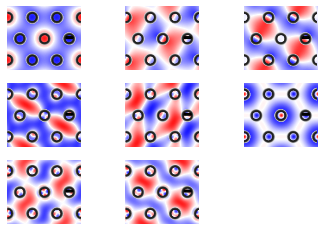

In [14]:
efields = []

def get_efields(ms, band):
    efields.append(ms.get_efield(band, bloch_phase=True))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(1 / -3, 1 / 3), mpb.fix_efield_phase,
          get_efields))

# Create an MPBData instance to transform the efields
md = mpb.MPBData(rectify=True, resolution=32, periods=3)

converted = []
for f in efields:
    # Get just the z component of the efields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='bwr', alpha=0.9)
    plt.axis('off')

plt.show()